In [1]:
%load_ext autoreload
%autoreload 2
import sys

path = "C:/Users/schiavaz/lava-nc/depth/"
sys.path.append(path)

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import open3d as o3d
from tqdm import tqdm
import scipy.io

import events_utils.filter as flt
import events_utils.visualize as vis
import events_utils.time_difference as td
import events_utils.time_difference_2d as td2d
import events_utils.tum_vie as tum_dset

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [63]:
#define time range
t_start = 0.0
duration = 0.2
t_end = t_start + duration
shape = (180, 180)

In [82]:
events_raw = np.loadtxt(path + "/pure_python_evaluation/gen_data/events_synt.txt")

In [83]:
events_t = flt.filter_time(events_raw, t_start, t_end)

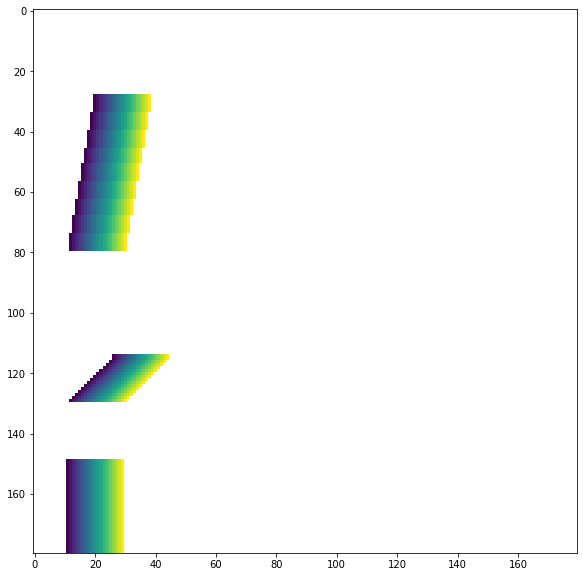

In [84]:
%matplotlib inline
plt.figure(figsize=(10, 10))
img = vis.events2time_surf(events_t, shape, filter_polarity=False, polarity=1)
img_m = np.ma.masked_where(img == 0, img)
m = plt.imshow(img_m, interpolation="none")
#plt.colorbar(mappable=m)

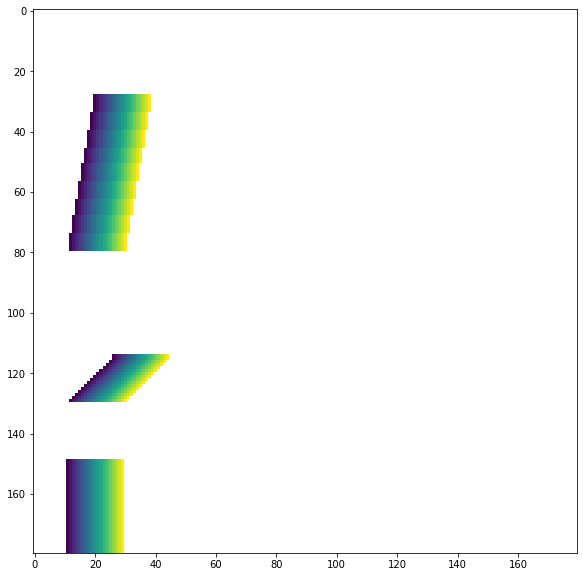

In [85]:
events = flt.filter_refract(events_t, 0.05)
%matplotlib inline
plt.figure(figsize=(10, 10))
img = vis.events2time_surf(events, shape, filter_polarity=False, polarity=0)
img_m = np.ma.masked_where(img == 0, img)
m = plt.imshow(img_m, interpolation="none")
#plt.colorbar(mappable=m)

In [86]:
poses_times = np.linspace(0.0, 1.0, 200)


In [87]:
poses = np.loadtxt(path + "data/slider-depth/groundtruth.txt")

In [88]:
time_d = td2d.TimeDifference2d(shape, events, poses)

(2, 338)


In [89]:
final_td, td_predictions, U, V, diff_list = time_d.compute_time_difference(dist = 1, px_range_pred=7, delay=0.15, avg_n=5, std_mul=1.1)

100%|███████████████████████████████████████████████████████████████████████████| 2064/2064 [00:00<00:00, 41405.81it/s]


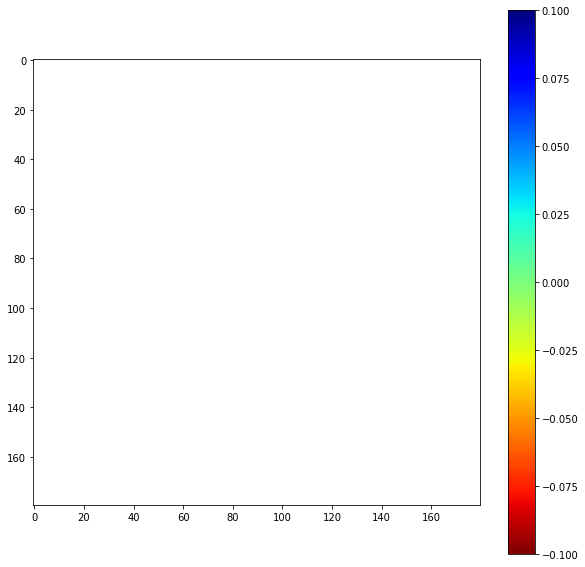

In [90]:
%matplotlib inline
plt.figure(figsize=(10, 10))
final_td_m = np.ma.masked_where(final_td == 0, final_td)
m = plt.imshow(final_td_m, cmap="jet_r", interpolation="none")
plt.colorbar(m)

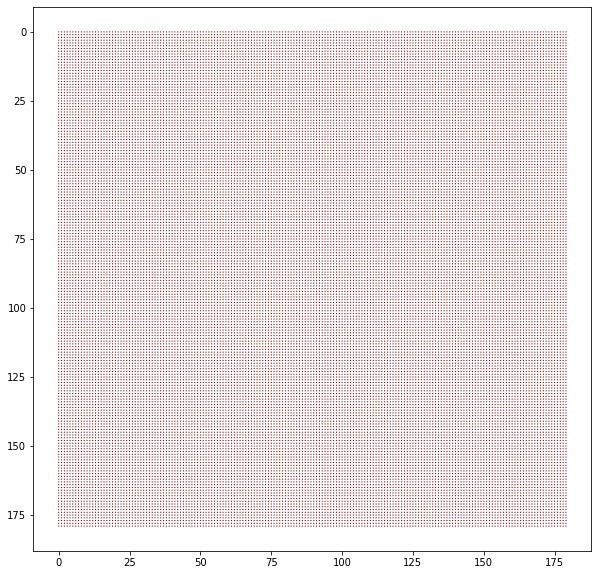

In [91]:
%matplotlib inline
plt.figure(figsize=(10, 10))
plt.quiver(U, V, U, scale =0.1, cmap="jet_r")
plt.gca().invert_yaxis()

In [52]:
u = np.divide(1.0, final_td_m, where=final_td!=0.0)
d = td.td2depth_slider(u)

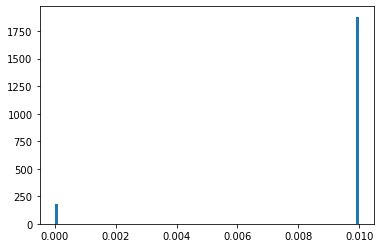

In [81]:
plt.hist(diff_list, 100);

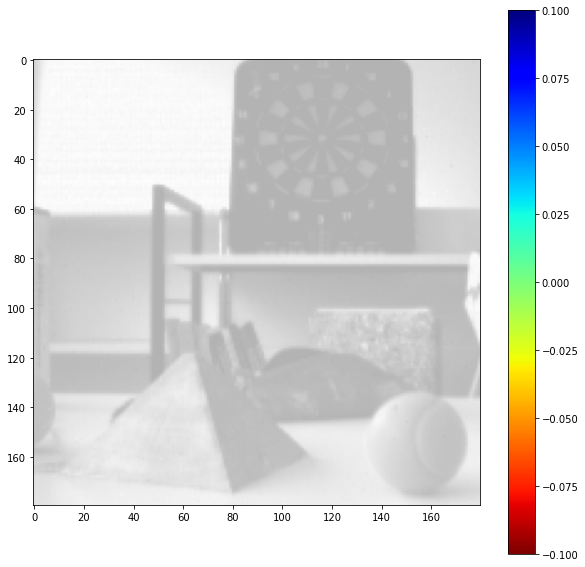

In [42]:
%matplotlib inline
plt.figure(figsize=(10, 10))
img_gray = plt.imread(path + "data/slider-depth/images/frame_00000041.png")
plt.imshow(img_gray, alpha=0.3, cmap="gray")
m = plt.imshow(d, cmap="jet_r", interpolation="none")
plt.colorbar(m)

In [203]:
%matplotlib qt
vis.visualize3d(d)